### Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation as cv

### Load Data

In [4]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))

### Data Exploration

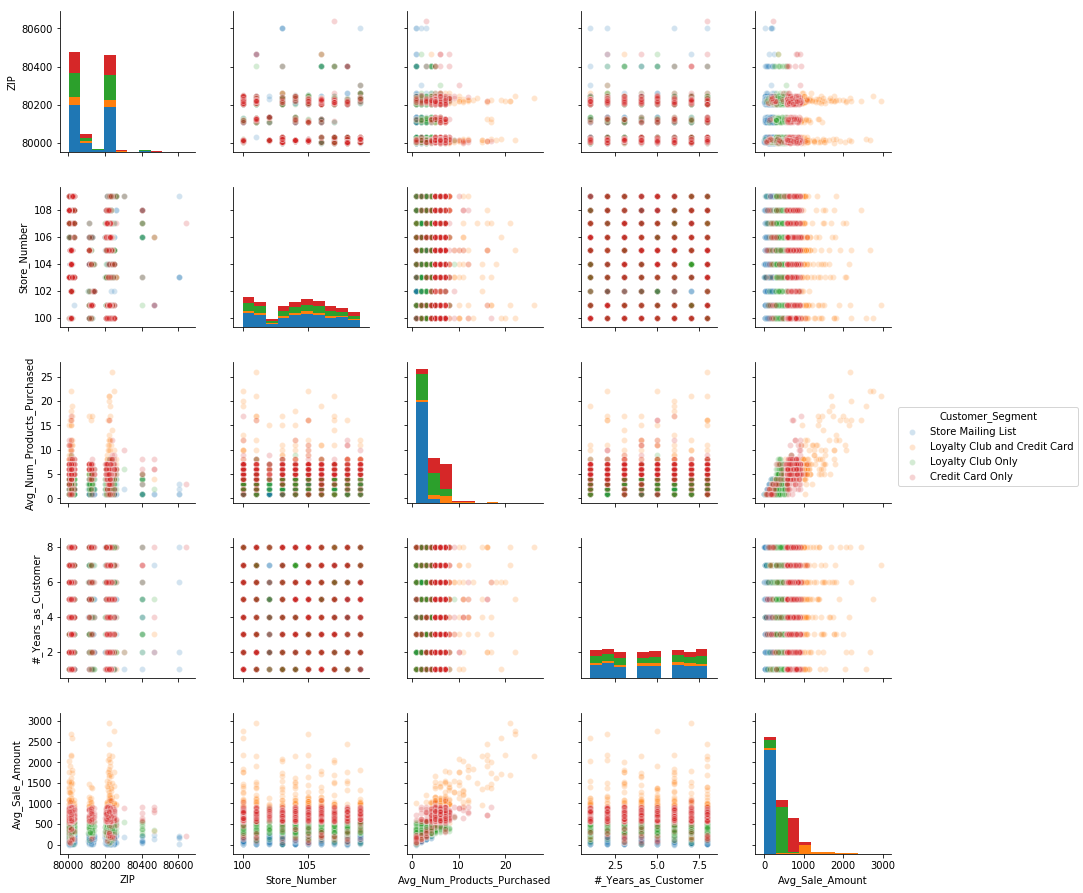

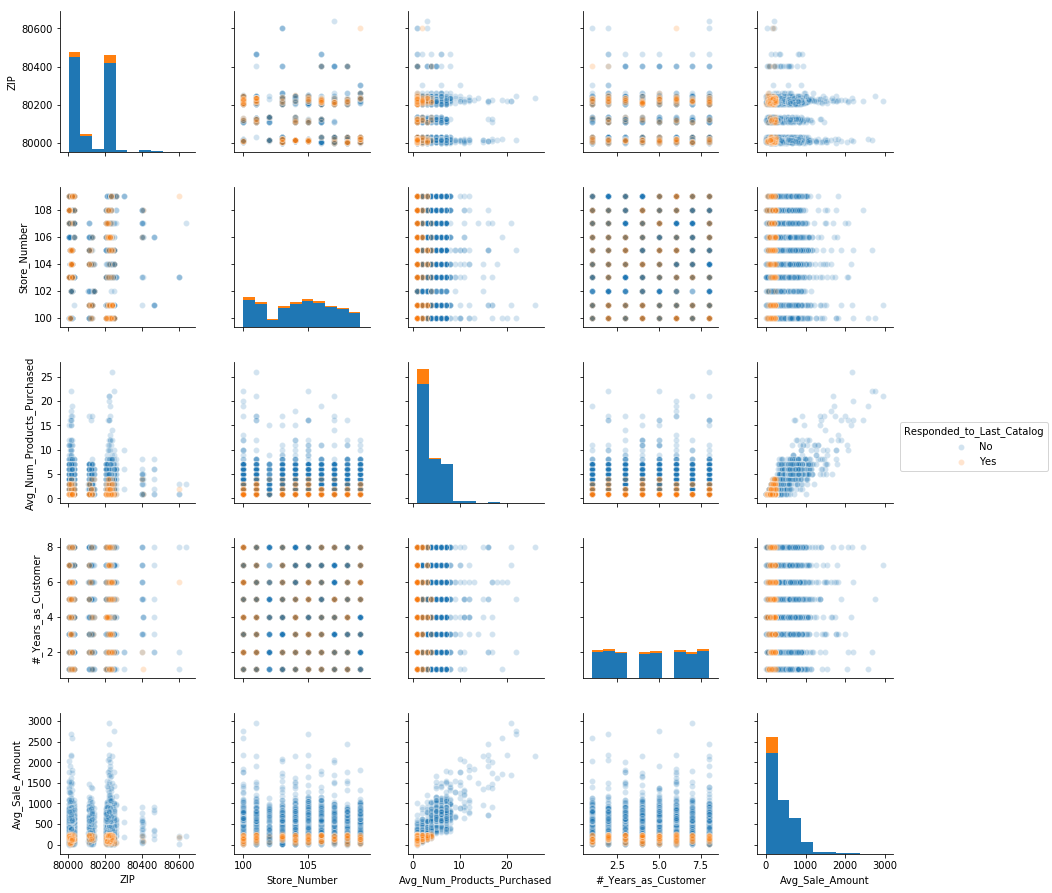

In [5]:
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Customer_Segment', plot_kws={'alpha': 0.2})
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Responded_to_Last_Catalog', plot_kws={'alpha': 0.2})

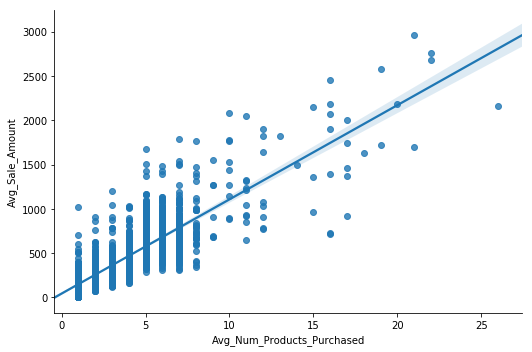

In [6]:
sns.lmplot(data=df, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', aspect=1.5)

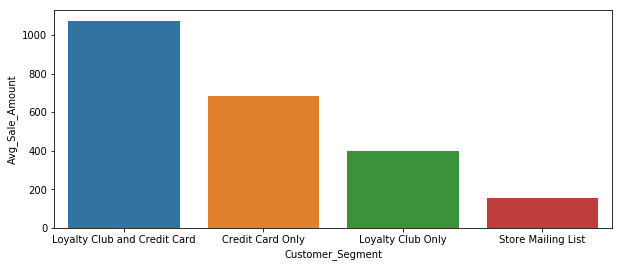

In [7]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Customer_Segment', y='Avg_Sale_Amount', order=['Loyalty Club and Credit Card',
                                                                       'Credit Card Only',
                                                                       'Loyalty Club Only',
                                                                       'Store Mailing List'],
           estimator=np.mean, ci=None)

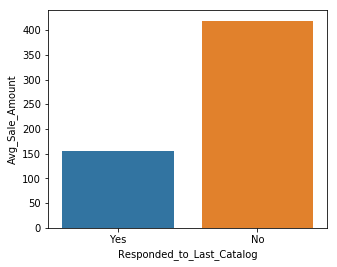

In [8]:
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='Responded_to_Last_Catalog', y='Avg_Sale_Amount', ci=None, order=['Yes','No'])

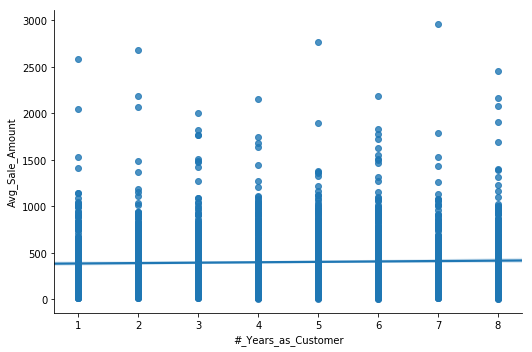

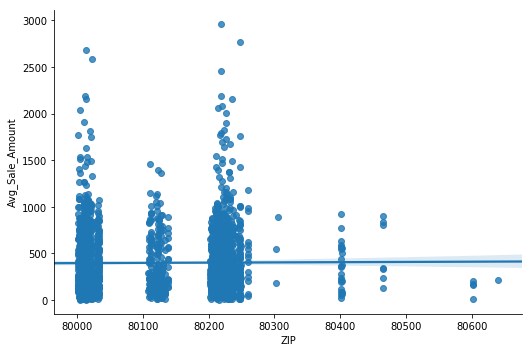

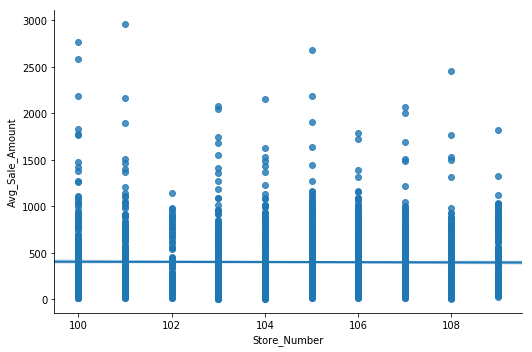

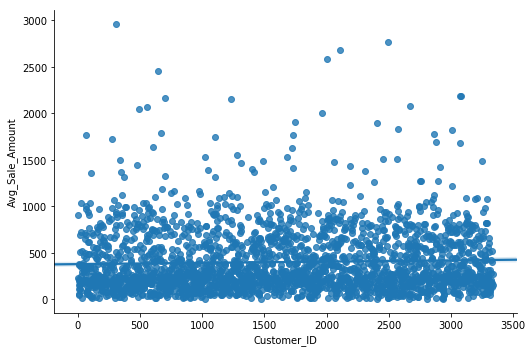

In [9]:
sns.lmplot(data=df, x='#_Years_as_Customer', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='ZIP', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='Store_Number', y='Avg_Sale_Amount', aspect=1.5)
sns.lmplot(data=df, x='Customer_ID', y='Avg_Sale_Amount', aspect=1.5)

### Create Dummy Variables for Customer Segment

In [10]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))
# Replace Customer_Segment with mapped number
# df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: customer_segment_map.keys()[customer_segment_map.values().index(x)])
df['Responded_to_Last_Catalog'] = df['Responded_to_Last_Catalog'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6,0,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6,0,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3,0,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6,0,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2,0,0,0,1


In [11]:
df[['Customer_Segment', 
           'Credit Card Only',
          'Loyalty Club Only',
          'Loyalty Club and Credit Card',
          'Store Mailing List']].drop_duplicates()

,Customer_Segment,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Store Mailing List,0,0,0,1
1108,Loyalty Club and Credit Card,0,0,1,0
1302,Loyalty Club Only,0,1,0,0
1881,Credit Card Only,1,0,0,0


### Perform Principal Components Analysis

In [22]:
# Split features and labels
pca_feature_names = ['Customer_ID', 'ZIP', 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                     '#_Years_as_Customer', 'Credit Card Only', 'Loyalty Club Only',
                     'Loyalty Club and Credit Card', 'Store Mailing List']
pca_features = df[pca_feature_names]
pca_labels = df['Avg_Sale_Amount']

In [23]:
pca_features

,Customer_ID,ZIP,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,2,80224,0,1,6,0,0,0,1
1,7,80111,1,1,6,0,0,0,1
2,8,80122,0,1,3,0,0,0,1
3,9,80239,1,1,6,0,0,0,1
4,10,80206,1,1,2,0,0,0,1
5,11,80212,0,1,8,0,0,0,1
6,12,80214,0,1,7,0,0,0,1
7,16,80002,0,3,1,0,0,0,1
8,17,80020,0,2,2,0,0,0,1
9,19,80016,0,1,6,0,0,0,1


In [26]:
pca = PCA()
X_pca = pca.fit_transform(scale(pca_features))

In [38]:
# Compute variance of principal components (% cumulative)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

[  25.4    40.58   53.71   65.09   76.27   87.02   96.56  100.01  100.01]


### Perform K-Fold CV w/ Shuffle

In [40]:
n = len(X_pca)
kf = cv.KFold(n, n_folds=10, shuffle=True, random_state=47)

reg = LinearRegression()
mse = []

In [42]:
# Intercept only
score = -1*cv.cross_val_score(reg, np.ones((n,1)), pca_labels.ravel(), cv=kf, scoring='mean_squared_error').mean()
mse.append(score)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sk

In [45]:
for i in np.arange(1,9):
    score = -1*cv.cross_val_score(reg, X_pca[:,:i], pca_labels.ravel(), cv=kf, scoring='mean_squared_error').mean()
    mse.append(score)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

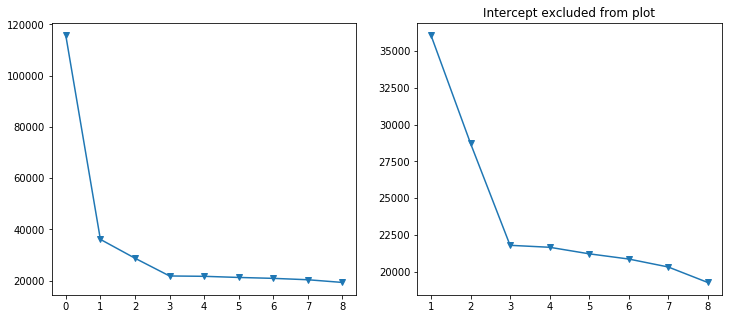

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8], mse[1:9], '-v')
ax2.set_title('Intercept excluded from plot')

In [108]:
feature_names = ['Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']
features = df[feature_names]
labels = df['Avg_Sale_Amount']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [120]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
reg.coef_

array([-153.36054551,  285.7386439 , -244.910896  ,   69.24931075])

In [122]:
reg.intercept_

297.40852031175939

In [123]:
y_pred = reg.predict(X_test)

In [124]:
from sklearn.metrics import r2_score, regression
print(r2_score(y_test, y_pred))

0.829373353831


In [125]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.82937335383062571

In [127]:
# Determine p-values for each coefficient
# reg.p

Coefficients: 
 [-153.36054551  285.7386439  -244.910896     69.24931075]
Mean squared error: 17272.63
Variance score: 0.83


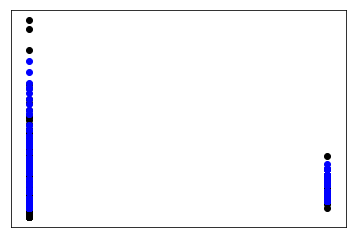

In [205]:
# Print and plot results
import matplotlib.pyplot as plt
%matplotlib inline

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test['Loyalty Club Only'], y_test,  color='black')
plt.scatter(X_test['Loyalty Club Only'], reg.predict(X_test), color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [206]:
df_mailing_list = pd.read_excel('p1-mailinglist.xlsx')
df_mailing_list = df_mailing_list.join(pd.get_dummies(df_mailing_list['Customer_Segment']))
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0


In [127]:
feature_names = ['Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']

In [128]:
df_mailing_list['Predicted_Average_Sale_Amount'] = reg.predict(df_mailing_list[feature_names])

In [129]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,351.795907
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,998.643029
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,628.793150
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,282.546596
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,421.045218


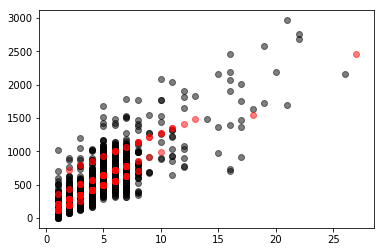

In [130]:
plt.figure()
plt.scatter(df['Avg_Num_Products_Purchased'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Avg_Num_Products_Purchased'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

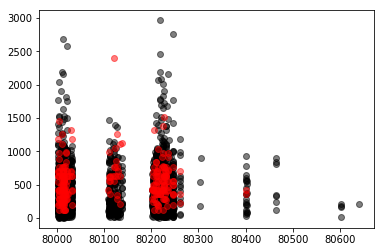

In [79]:
plt.figure()
plt.scatter(df['ZIP'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['ZIP'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

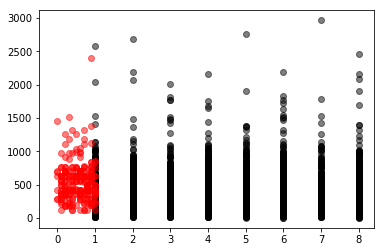

In [80]:
plt.figure()
plt.scatter(df['#_Years_as_Customer'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['#_Years_as_Customer'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

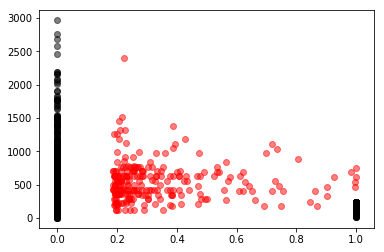

In [83]:
plt.figure()
plt.scatter(df['Responded_to_Last_Catalog'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Score_Yes'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)

In [45]:
df_mailing_list['Predicted_Revenue'] = df_mailing_list['Predicted_Average_Sale_Amount']*df_mailing_list['Score_Yes']

In [46]:
df_mailing_list.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,Predicted_Average_Sale_Amount,Predicted_Revenue
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,0,1,0,0,349.0000,106.457497
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,0,1,0,973.7500,460.315518
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,0,1,0,0,628.6250,363.899603
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,0,1,0,0,279.1250,85.171591
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,0,1,0,0,418.9375,162.424522


In [138]:
print "Total Predicted Revenue: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Revenue']))

Total Predicted Revenue: $46901.72
